# Pangyo AI Challenge 2021 - Mask Classification Baseline

## 라이브러리 호출 및 I/O

In [4]:
import os, torch, copy, cv2, sys, random, logging
from datetime import datetime, timezone, timedelta
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import json

In [2]:
!pip install scikit-image

In [3]:
!pip install basic-image-eda

In [4]:
from basic_image_eda import BasicImageEDA

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# # 시드(seed) 설정

# RANDOM_SEED = 2021
# torch.manual_seed(RANDOM_SEED)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
# np.random.seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)

In [53]:
# working directory 지정
ROOT_PATH = './'
DATA_DIR = os.path.join(ROOT_PATH, 'train')
RESULT_DIR = os.path.join(ROOT_PATH, 'results')
WEIGHT_DIR = os.path.join(ROOT_PATH, ' weights')
NUMPY_DIR = os.path.join(ROOT_PATH, 'numpy')
EXAMPLE_DIR = os.path.join(ROOT_PATH, 'example')

# 1. Using Basic Image EDA

## All


found 1687 images.
Using 20 threads. (max:20)



100%|██████████| 1687/1687 [00:00<00:00, 2248.94it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1687

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  60
max height                               |  582
mean height                              |  186.4872554831061
median height                            |  154

min width                                |  24
max width                                |  354
mean width                               |  81.07824540604624
median width                             |  64

mean height/width ratio                  |  2.300089926085145
median height/width ratio                |  2.40625
recommended input size(by mean)          |  [184  80] (h x w, multiples of 8)
recommended input size(by mean)          |  [192  80] (h x w, multiples of 16)
recommended input size(by m

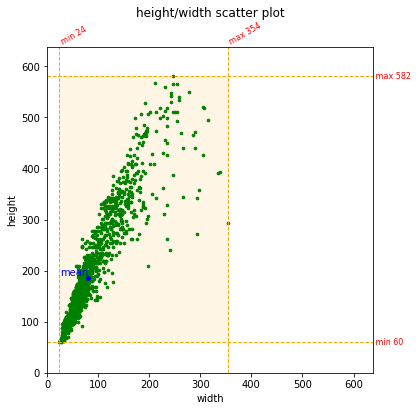

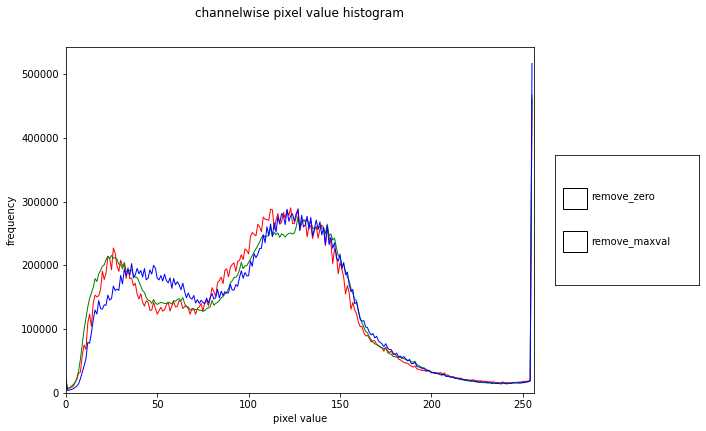

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['png'],
 'min_h': 60,
 'max_h': 582,
 'mean_h': 186.4872554831061,
 'median_h': 154,
 'min_w': 24,
 'max_w': 354,
 'mean_w': 81.07824540604624,
 'median_w': 64,
 'mean_hw_ratio': 2.300089926085145,
 'median_hw_ratio': 2.40625,
 'rec_hw_size_8': array([184,  80]),
 'rec_hw_size_16': array([192,  80]),
 'rec_hw_size_32': array([192,  96]),
 'mean': array([0.40298724, 0.40378255, 0.4223949 ], dtype=float32),
 'std': array([0.22100371, 0.22258034, 0.21748717], dtype=float32)}

In [9]:
extensions = ['png']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = True

BasicImageEDA.explore(DATA_DIR, extensions, threads, dimension_plot, channel_hist, nonzero)

## Mask


found 1475 images.
Using 20 threads. (max:20)



100%|██████████| 1475/1475 [00:00<00:00, 4862.60it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1475

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  60
max height                               |  403
mean height                              |  161.1864406779661
median height                            |  144

min width                                |  24
max width                                |  229
mean width                               |  68.47796610169492
median width                             |  60

mean height/width ratio                  |  2.3538438691153902
median height/width ratio                |  2.4
recommended input size(by mean)          |  [160  72] (h x w, multiples of 8)
recommended input size(by mean)          |  [160  64] (h x w, multiples of 16)
recommended input size(by mean

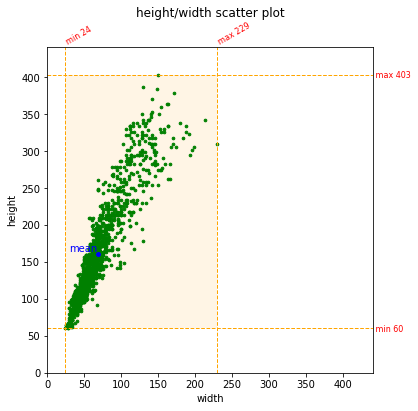

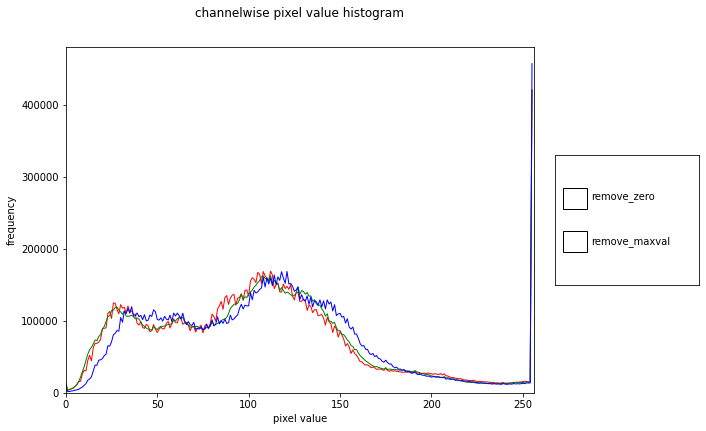

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['png'],
 'min_h': 60,
 'max_h': 403,
 'mean_h': 161.1864406779661,
 'median_h': 144,
 'min_w': 24,
 'max_w': 229,
 'mean_w': 68.47796610169492,
 'median_w': 60,
 'mean_hw_ratio': 2.3538438691153902,
 'median_hw_ratio': 2.4,
 'rec_hw_size_8': array([160,  72]),
 'rec_hw_size_16': array([160,  64]),
 'rec_hw_size_32': array([160,  64]),
 'mean': array([0.4028704 , 0.40522462, 0.42750102], dtype=float32),
 'std': array([0.22474392, 0.22509643, 0.21971165], dtype=float32)}

In [10]:
extensions = ['png']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = True

BasicImageEDA.explore(os.path.join(DATA_DIR, "Mask"), extensions, threads, dimension_plot, channel_hist, nonzero)

## No Mask


found 212 images.
Using 20 threads. (max:20)



100%|██████████| 212/212 [00:00<00:00, 976.19it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  212

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['png']

min height                               |  122
max height                               |  582
mean height                              |  362.5188679245283
median height                            |  363

min width                                |  54
max width                                |  354
mean width                               |  168.74528301886792
median width                             |  164

mean height/width ratio                  |  2.148320008945044
median height/width ratio                |  2.2134146341463414
recommended input size(by mean)          |  [360 168] (h x w, multiples of 8)
recommended input size(by mean)          |  [368 176] (h x w, multiples of 16)
recommended in

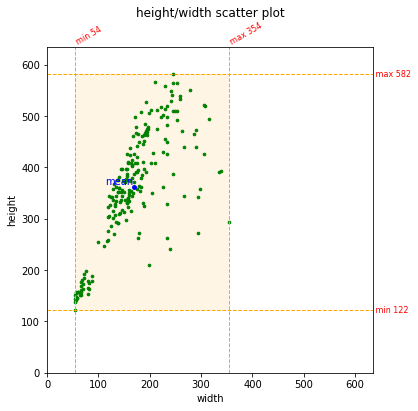

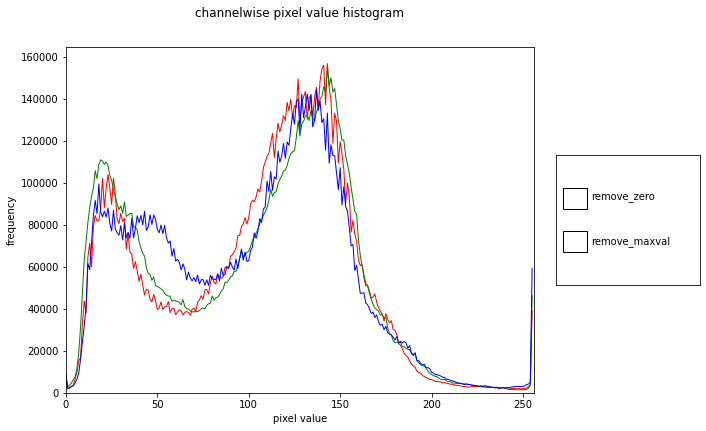

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['png'],
 'min_h': 122,
 'max_h': 582,
 'mean_h': 362.5188679245283,
 'median_h': 363,
 'min_w': 54,
 'max_w': 354,
 'mean_w': 168.74528301886792,
 'median_w': 164,
 'mean_hw_ratio': 2.148320008945044,
 'median_hw_ratio': 2.2134146341463414,
 'rec_hw_size_8': array([360, 168]),
 'rec_hw_size_16': array([368, 176]),
 'rec_hw_size_32': array([352, 160]),
 'mean': array([0.40380073, 0.39374906, 0.3868684 ], dtype=float32),
 'std': array([0.19298086, 0.20393902, 0.19771513], dtype=float32)}

In [11]:
extensions = ['png']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = True

BasicImageEDA.explore(os.path.join(DATA_DIR, "NoMask"), extensions, threads, dimension_plot, channel_hist, nonzero)

# 2. Relative Face Position

In [1]:
import mtcnn
from mtcnn.mtcnn import MTCNN

In [26]:
def extract_face(filename):
    # load image from file
    pixels = plt.imread(filename)
    image_h, image_w, _ = pixels.shape
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    
    try:
        print(results)
        x1, y1, width, height = results[0]['box']
        xc, yc = x1 + 0.5*width, y1 + 0.5*height
        xr, yr = xc/image_w, yc/image_H
        return {"xc":xc, 
                "yc":yc, 
                "xr":xr, 
                "yr":yr, 
                "w":width, 
                "h":height}
    except:
        return None

In [27]:
extract_face("example.png")

[]


In [31]:
extract_face("sara_stone.jpg") # MTCNN 은 저희와 함꼐 가지 못하게 되었습니다 ㅠㅠ

[{'box': [200, 99, 78, 105], 'confidence': 0.9991359114646912, 'keypoints': {'left_eye': (218, 142), 'right_eye': (255, 142), 'nose': (234, 161), 'mouth_left': (219, 179), 'mouth_right': (256, 179)}}]


In [32]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git

  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-n40m5lng
  Running command git clone -q https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-n40m5lng
  Created wheel for face-detection: filename=face_detection-0.2.1-py3-none-any.whl size=29714 sha256=1c51a17ec3c2cf91425cd64d2f9b5514d8044dfd733c633d124068edba6d143e
  Stored in directory: /tmp/pip-ephem-wheel-cache-1135gweq/wheels/df/63/27/2e36a009514502ee542ea9e21457f4fa6bdbeb17d4f1428a01
Successfully built face-detection


In [33]:
import face_detection

In [57]:
def draw_faces(im, bboxes):
    for bbox in bboxes:
        x0, y0, x1, y1 = [int(_) for _ in bbox]
        cv2.rectangle(im, (x0, y0), (x1, y1), (0, 0, 255), 2)

In [35]:
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)

In [43]:
# check if DSFDDetector is good for Mask/NoMask

im = cv2.imread("example.png")
detections = detector.detect(im[:, :, ::-1])

In [44]:
detections

array([[36.463684  ,  8.981351  , 47.365376  , 22.123741  ,  0.64148647]],
      dtype=float32)

In [52]:
filenames = os.listdir('example')
filenames = [f for f in filenames if not f[0] == '.']
filenames

['nomask2.png',
 'mask1.png',
 'nomask1.png',
 'nomask4.png',
 'mask2.png',
 'mask3.png',
 'mask4.png',
 'nomask3.png']

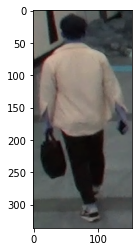

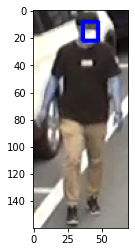

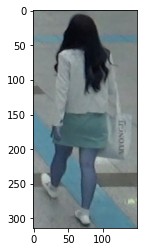

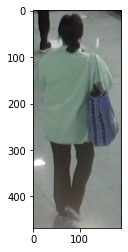

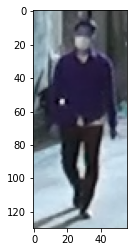

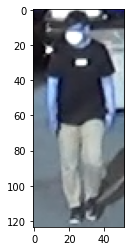

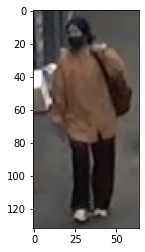

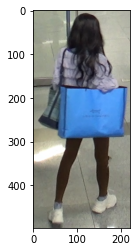

In [56]:
for f in filenames:
    IM_PATH = os.path.join(EXAMPLE_DIR, f)
    im = cv2.imread(IM_PATH)
    detections = detector.detect(im[:, :, ::-1])
    
    draw_faces(im, detections[:, :4])
    plt.imshow(im)
    plt.show()

In [46]:
draw_faces(im, detections[:, :4])

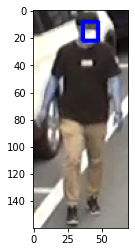

In [48]:
plt.imshow(im)
plt.show()

In [30]:
xc_list = []
yc_list = []
xr_list = []
yr_list = []
w_list = []
h_list = []

i = 0

for dirpath, dirnames, filenames in os.walk(DATA_DIR+'/NoMask'):
    filenames = [f for f in filenames if not f[0] == '.']
    dirnames[:] = [d for d in dirnames if not d[0] == '.']
    for filename in [f for f in filenames if f.endswith(".png")]:
        extracted = extract_face("example.png")
        if extracted is not None:
            
            print(extracted)
            xc_list.append(extracted["xc"])
            yc_list.append(extracted["yc"])
            xr_list.append(extracted["xr"])
            yr_list.append(extracted["yr"])
            w_list.append(extracted["w"])
            h_list.append(extracted["h"])
            i += 1
        if i > 10:
            break

1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]
1
[]


In [13]:
os.dirli

AttributeError: module 'os' has no attribute 'dirlist'